# P219 Problem Set 2

This notebook reproduces the code for P219 Problem Set 2. The questions in this problem set are based on [Killian (2009)](https://www.aeaweb.org/articles?id=10.1257/aer.99.3.1053) and use a `.mat` data provided by the course TA.

We begin by importing the necessary libraries and organizing the the data in `Kilian_Data_Updated.mat` into a `DataFrame`.

In [180]:
# Import necessary packages
using MAT, DataFrames, Plots, LinearAlgebra

# Read .mat file and save as variable
fileIn = matopen("./data/Kilian_Data_Updated.mat")
mat_file = read(fileIn)
close(fileIn)

# Read data as dataframe
df = DataFrame(mat_file["data"], :auto)

# Put name dictionary as name for variables
rename!(df, Symbol.(vec(mat_file["varNames"])))

# Add dates column
df.Date = vec(mat_file["dates"]);

Now that we have the data, we can start by plotting the variables in a figure with three panes: one for each variable in the `DataFrame`.

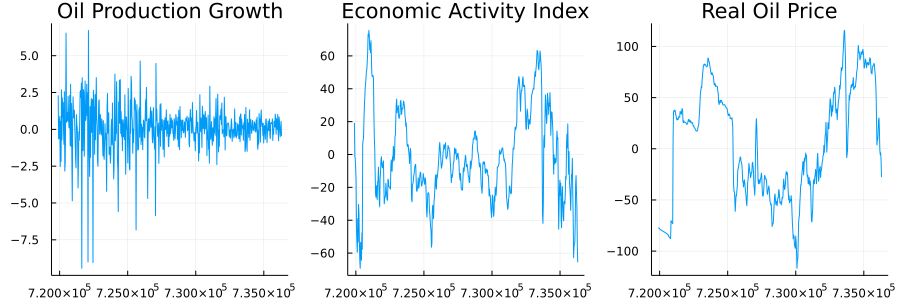

In [143]:
# Plot all variables in a three-panel graph (need to put this in loop and edit graphs)
plot1 = plot(df[!, :"Date"], df[!, :"Oil Production Growth"], title = "Oil Production Growth")
plot2 = plot(df[!, :"Date"], df[!, :"Economic Activity Index"], title = "Economic Activity Index")
plot3 = plot(df[!, :"Date"], df[!, :"Real Oil Price"], title = "Real Oil Price")

plot(plot1, plot2, plot3, layout = (1, 3), legend = false, size = (900, 300))

Need to add reasoning for recursive identification in the form of:

\begin{align*}
    \textbf{u}_t = \begin{pmatrix}
                   u_t^1 \\
                   u_t^2 \\
                   u_t^3
                   \end{pmatrix} = \begin{pmatrix}
                   a_{11} & 0 & 0 \\
                   a_{21} & a_{22} & 0 \\
                   a_{31} & a_{32} & a_{33}
                   \end{pmatrix} \begin{pmatrix} 
                                  \varepsilon_t^1 \\ 
                                  \varepsilon_t^2 \\
                                  \varepsilon_t^3
                                 \end{pmatrix}
\end{align*}

Include text justification here

## 1.1 Estimating the reduced form VAR

The next step in our analysis is to estimate a reduced form VAR given the data we have available. Write summary of what the function is supposed to do.

In [246]:
# Define var_ols function
function var_ols(data, constant, p)
    """
    Include function description here
    
    Inputs
    ------
        data      : a matrix with the data to be used
        constant  : a boolean determining whether the function should use a constant
        p         : an integer with the number of lags in the VAR
    
    Outputs
    -------
        results   : a dictionary containing vector B and Σ with OLS estimate and
                    variance-covariance matrix
    
    """
    # Retrieve number of rows and columns of matrix data as tuple of ints
    T, K = size(data)::Tuple{Int64, Int64}
    # Assign variable as number of rows in final data matrix
    t =  Int(T-p)
    # Create matrix structure for dependent variables
    Y = data[p+1:T, :]
    # Build matrix with lagged values
    for i = 1:p
        # If constant true include column of ones in X
        if constant == true
            X = ones(t, 1)
            X = [X data[p+1-i:T-i,:]]
        # Otherwise do not include column of ones in X
        else
            X = [data[p+1-i:T-i,:]]
        end
    end
    println(size(X))
    # Calculate B matrix as OLS given data matrix X
    B = (X'*X)\(X'*Y)
    # Calculate errors given estimated B
    u = Y - X*B
    # Estimate Σ as variance-covariance matrix
    Σ = (u*u')
    # Return tuple with matrix B and Σ
    return (B, Σ)
end;

In [247]:
results = var_ols(mat_file["data"], true, 200)

LoadError: ArgumentError: number of rows of each array must match (got (540, 340))

In [239]:
size(mat_file["data"][10+1:540, :])

(530, 3)

In [175]:
z = mat_file["data"]
pbar = 2

T,K = size(z)::Tuple{Int64,Int64}
t   = Int(T-pbar)
IC  = zeros(pbar,1)
Y = z[pbar+1:T,:]                           # dependent variable

for p = 1:pbar
    global X = ones(t,1)
    for i = 1:p
        X = [X z[pbar+1-i:T-i,:]]            # construct lagged regressors
    end
    global β  = (X'*X)\(X'*Y)                    # estimate by multivariate LS **
    global u     = Y-X*β                         # errors
    global Σ   = (u'*u/t)::AbstractArray{Float64}
end;

In [196]:
Int(540-2)

538

In [190]:
function var_lagorder2(z::AbstractArray,pbar::Int64)
    T,K = size(z)::Tuple{Int64,Int64}
    t   = Int(T-pbar)
    IC  = zeros(pbar,1)
    Y = z[pbar+1:T,:]                           # dependent variable
    for p = 1:pbar
        X = ones(t,1)
        for i = 1:p
            X = [X z[pbar+1-i:T-i,:]]            # construct lagged regressors
        end
        β  = (X'*X)\(X'*Y)                    # estimate by multivariate LS **
        u     = Y-X*β                         # errors
        Σ   = (u'*u/t)::AbstractArray{Float64}
    end
    
    return β
end

var_lagorder2 (generic function with 1 method)

In [191]:
var_lagorder2(mat_file["data"], 12)

7×3 Matrix{Float64}:
  0.128843    -0.173204    0.255699
 -0.0975457    0.0587985   0.0461282
  0.0125129    1.1427      0.0519076
  0.00562417   0.139221    1.38788
 -0.0659536    0.316198   -0.600922
 -0.0154676   -0.194021   -0.0220514
 -0.00656336  -0.143642   -0.408776

In [179]:
A = [-4. -17.; 2. 2.]
det(A)

LoadError: UndefVarError: det not defined